# EDA Project - Zuber

## Introduction

For this project, I'm going to work with the data I've parsed from the internet regarding taxi rides in Chicago. The purpose of this project is to analyze and better understand passenger preferences as well as external factors that could impact the rides. I will try to uncover patterns from the data to provide better insights in future rides as well as improved customer satisfaction. 

This project will consist of 3 steps:

1. [Data Overview](#data_overview)
2. [Data Preprocessing](#data_preprocessing)
3. [Data Analysis](#data_analysis)

First I will do an overview of the data to identify what the dataframe entails, such as their data types, column names, the contents of each column, whether or not they have missing and/or duplicate values, etc. 

Secondly, I will preprocess the data by changing the data to their correct types, changing the column names to their appropriate format, as well as dealing with the missing and duplicate values. I may also add more columns and values should the need arises.

Lastly, once the data has been processed, I will begin the analysis. This includes making graphs, comparisons, and coming up with some hypotheses and answers. By the end of this step I would expect to have gained an understanding to the patterns of the customers and the external factors.

## Initialize

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

<a id='data_overview'></a>
## Data Overview

In [2]:
# Pulling the dataset and assigning to a variable

companies = pd.read_csv('/datasets/project_sql_result_01.csv')
trips = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
# Getting an overview of the data

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Printing the first rows

companies.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


**This dataset looks good.**

In [5]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


It wouldn't make sense for there to be a half-trip, so I am going to change the data type of the average trips column so it shows whole numbers. Overall everything looks ok.

<a id='data_preprocessing'><a/>
## Data Preprocessing

There doesn't seem to be missing values according to the overview, so I'm just going to check for duplicates instead.

In [7]:
# Changing data type of the average trip

trips.average_trips = trips.average_trips.astype('int')
trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


Looks better.

In [9]:
# Checking for duplicates

companies.duplicated().sum()

0

In [10]:
# Checking duplicates in just the name

companies.company_name.duplicated().sum()

0

In [11]:
trips.duplicated().sum()

0

In [12]:
trips.dropoff_location_name.duplicated().sum()

0

No duplicates found.

<a id='data_analysis'></a>
## Data Analysis

In [13]:
# Looking for the top 10 neighborhood in terms of trips

top10_trips = trips.sort_values(by='average_trips', ascending=False).head(10)
top10_trips

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [14]:
# Top 10 companies in terms of trips 

top10_comps = companies.sort_values(by='trips_amount', ascending=False).head(10)
top10_comps

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


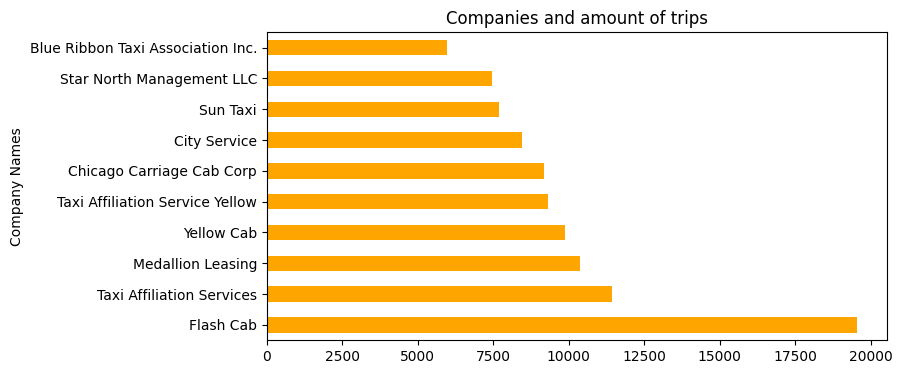

In [15]:
top10_comps.plot(
    ylim=(0, 20000),
    legend=False,
    title='Companies and amount of trips',
    kind='barh',
    x='company_name',
    color='orange',
    xlabel='Company Names',
    
    figsize=[8, 4]
)

plt.show()

It seems that Flash Cab dominates the amount of trips, showed by the fact that Taxi Affiliation Services, which comes in 2nd, has nearly half the amount of trips as Flash Cab.

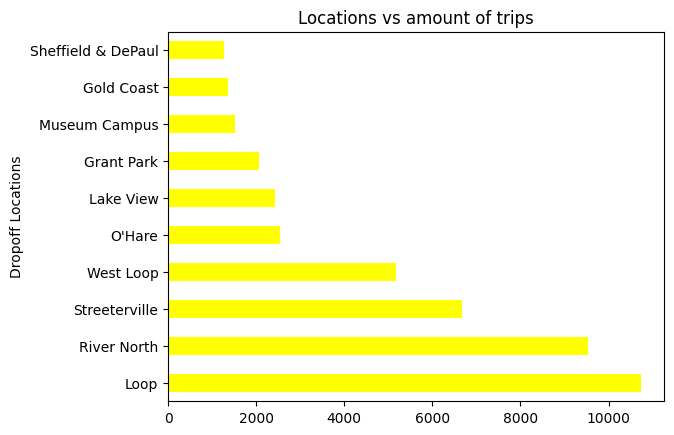

In [22]:
top10_trips.plot(
    kind='barh',
    color='yellow',
    x='dropoff_location_name',
    xlabel='Dropoff Locations',
    legend=False,
    title='Locations vs amount of trips'
)

plt.show()

Loop seems to be the most popular destination on cabs, followed by River North, Streeterville, and West Loop. After West Loop, the destination's amount of trips drop to nearly half the one above it, and continues to decrease at a steady rate to the 10th place.

# Loop - O'Hare Trips

In [16]:
# Loading the dataset

rides = pd.read_csv('/datasets/project_sql_result_07.csv')

# Overview 

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
rides.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


This dataset has the wrong data type on the start_ts column, and doesn't have the necessary data available for me to calculate on, which is the day of the week.

In [18]:
# Changing the data type

rides.start_ts = pd.to_datetime(rides.start_ts)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [19]:
# Grabbing the day of the week from the date

rides['day'] = rides.start_ts.dt.day_name()
rides

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


In [20]:
rides.day.unique()

array(['Saturday'], dtype=object)

With everything in place, I will now test and calculate the dataset on how the weather affects the duration of the rides. I will assume the weather condition 'Bad' refers to rainy days.

H₀ = The average duration of rides stay the same on rainy Saturdays.

H1 = The average duration of rides differs on rainy Saturdays.

In [21]:
# Setting the alpha value to 5% for appropriate amount of uncertainty

alpha = 0.05

# Applying the test to duration for both weather conditions and compare the values

results = st.ttest_ind(
    rides[rides.weather_conditions == 'Good'].duration_seconds,
    rides[rides.weather_conditions == 'Bad'].duration_seconds
)
# 
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.517970327099473e-12
We reject the null hypothesis


Based on this test we can see that the weather actually does affect how long the rides would take. This logically would make sense, considering how the weather impacts a lot things in our daily lives, such as roads, traffic, schedules, etc.

## Conclusion

From the exploratory data analysis I have gotten some insights into Chicago's passenger's preferences and external factors that could impact the rides.

The data shows that Flash Cab dominates the amount of trips with over two times the amount of trips from the 2nd place, which is the Taxi Affiliation Service. The most popular destionation using cabs seems tobe Loop, followed by River North, Streeterville, and West Loop.

At the end of the analysis, I've formulated a hypothesis based on how weather would affect the duration of the rides. The test results show that the weather actually does affect how long the rides would take. This logically would make sense, considering how the weather impacts a lot things in our daily lives, such as roads, traffic, schedules, etc.